# Capstone Project

## Exploring and Clustering the Montreal Neighborhoods

The csv file containing details about the Montreal Neighborhoods is prepared and uploaded to the current directory of this notebook

In [28]:
import pandas as pd

MontrealData = pd.read_csv('Montreal Neighborhoods.csv', header=0)
MontrealData

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,H3L,Ahuntsic-Cartierville,Ahuntsic,45.55530,-73.67139
1,H3M,Ahuntsic-Cartierville,Nouveau-Bordeaux,45.53543,-73.68711
2,H4J,Ahuntsic-Cartierville,Cartierville,45.52899,-73.70293
3,H2Y,Ahuntsic-Cartierville,Saint-Sulpice,45.50453,-73.55515
4,H2B,Ahuntsic-Cartierville,Sault-au-Recollet (Ile de la Visitation),45.57523,-73.66274
5,H1K,Anjou,Anjou,45.60219,-73.55961
6,H3T,Cote-des-Neiges-Notre-Dame-de-Grace,Cote-des-Neiges,45.49853,-73.62716
7,H4B,Cote-des-Neiges-Notre-Dame-de-Grace,Notre-Dame-de-Grace,45.46711,-73.62250
8,H3W,Cote-des-Neiges-Notre-Dame-de-Grace,Snowdon,45.48899,-73.64058
9,H8S,Lachine,Ville Saint-Pierre,45.43297,-73.68113


In [29]:
print('The final list has {} neighborhoods'.format(MontrealData.shape[0]))

The final list has 43 neighborhoods


Now we will start our analysis and exploration for the Montreal boroughs and neighborhoods to find out what characterizes each area 

Let's visualize Montreal and its neighborhoods using folium maps

In [30]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import folium

address = 'Montreal, CA'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Montreal are {}, {}.'.format(latitude, longitude))

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

The geograpical coordinate of Montreal are 45.4972159, -73.6103642.


In [31]:
map_Montreal = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(MontrealData['Latitude'], MontrealData['Longitude'], MontrealData['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Montreal)  
    
map_Montreal

Let us utilize the foursquare API to start exploring the neighborhoods

In [32]:
CLIENT_ID = 'K5V2DAEEZCCIN0YBCKEJKCOREPXP0FZF3XAKUH0OWFOEPL1N' # Foursquare ID
CLIENT_SECRET = 'HQD4CAO4HCDIHW2I2HKVI45NGA1K2YGAN4SIYWNYXRF50I2O' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [33]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

Define the methods to get all venues with a radius of 500 and a limit of 100

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, limit=100):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now get the result of this method on the Montreal neighborhood to get the venues

In [35]:
Montreal_venues = getNearbyVenues(names=MontrealData['Neighborhood'],
                                   latitudes=MontrealData['Latitude'],
                                   longitudes=MontrealData['Longitude']
                                  )

Ahuntsic
Nouveau-Bordeaux
Cartierville
Saint-Sulpice
Sault-au-Recollet (Ile de la Visitation)
Anjou
Cote-des-Neiges
Notre-Dame-de-Grace
Snowdon
Ville Saint-Pierre
LaSalle
The Plateau
Mile End 
Milton-Parc
DeLorimier
Jeanne-Mance
Griffintown
Pointe-Saint-Charles
Saint-Henri
Cote-Saint-Paul
Ville-Emard
Jacques-Bizard
Sainte-Genevieve
Hochelaga-Maisonneuve
Montreal-Nord
Outremont
Pierrefonds
Roxboro
Pointe-aux-Trembles
Riviere-des-Prairies
La Petite-Patrie
Rosemont
Bois-Franc
Citta Italiana
Nuns' Island
Downtown Montreal
Cite du Multimedia
Quartier International de Montreal 
Quartier Latin
Quartier des spectacles
Shaughnessy Village
Saint-Michel 
Villeray


In [36]:
print(Montreal_venues.shape)
Montreal_venues.head()

(1150, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ahuntsic,45.5553,-73.67139,IGA,45.556743,-73.668094,Grocery Store
1,Ahuntsic,45.5553,-73.67139,A&W Canada,45.554871,-73.668923,Fast Food Restaurant
2,Ahuntsic,45.5553,-73.67139,Pizza Pizza,45.554562,-73.668458,Pizza Place
3,Ahuntsic,45.5553,-73.67139,Petro-Canada,45.554955,-73.668821,Gas Station
4,Ahuntsic,45.5553,-73.67139,Brasserie au Coin du Métro Henri Bourassa Ltée,45.555406,-73.668371,Deli / Bodega


Let us check the venues returned for each neighborhood

In [37]:
Montreal_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ahuntsic,12,12,12,12,12,12
Anjou,27,27,27,27,27,27
Cartierville,2,2,2,2,2,2
Cite du Multimedia,73,73,73,73,73,73
Citta Italiana,5,5,5,5,5,5
Cote-Saint-Paul,3,3,3,3,3,3
Cote-des-Neiges,46,46,46,46,46,46
DeLorimier,100,100,100,100,100,100
Downtown Montreal,33,33,33,33,33,33


Let's find out how many unique categories can be curated from all the returned venues

In [38]:
print('There are {} uniques categories.'.format(len(Montreal_venues['Venue Category'].unique())))

There are 215 uniques categories.


Let us analyze each neighborhood in this dataframe

In [64]:
# To display all columns
pd.set_option('display.max_columns', None)

Montreal_onehot = pd.get_dummies(Montreal_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe but we will call it MontrealNeighborhood because we have a venue category called Neighborhood
Montreal_onehot['MontrealNeighborhood'] = Montreal_venues['Neighborhood']
# move MontrealNeighborhood column to the first column
fixed_columns = [Montreal_onehot.columns[-1]] + list(Montreal_onehot.columns[:-1])
Montreal_onehot = Montreal_onehot[fixed_columns]
Montreal_onehot.head()

,MontrealNeighborhood,Adult Boutique,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Drugstore,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Football Stadium,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Library,Liquor Store,Lounge,Luggage Store,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Other Event,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Public Art,Record Shop,Recording Studio,Rental Car Location,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,School,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Ahuntsic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ahuntsic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ahuntsic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [53]:
Montreal_grouped = Montreal_onehot.groupby('MontrealNeighborhood').mean().reset_index()
Montreal_grouped.head()

,MontrealNeighborhood,Adult Boutique,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Drugstore,Dumpling Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Football Stadium,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Library,Liquor Store,Lounge,Luggage Store,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Other Event,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Poutine Place,Pub,Public Art,Record Shop,Recording Studio,Rental Car Location,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,School,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Ahuntsic,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.083333,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.083333,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.083333,0.0,0.000000,0.0,0.000000,0.0,0.083333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.083333,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.083333,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.083333,0.083333,0.0,0.00

Write a function to sort venues in descending order

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create a new dataframe and display top 10 venues for each neighborhood 

In [42]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Montreal_grouped['MontrealNeighborhood']

for ind in np.arange(Montreal_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Montreal_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahuntsic,Deli / Bodega,Rental Car Location,Bus Station,Fast Food Restaurant,Metro Station,Gas Station,Park,Grocery Store,Restaurant,Coffee Shop
1,Anjou,Clothing Store,Coffee Shop,Burger Joint,Grocery Store,Pizza Place,Restaurant,Electronics Store,Fabric Shop,Fast Food Restaurant,Shop & Service
2,Cartierville,Construction & Landscaping,Kids Store,Yoga Studio,English Restaurant,Football Stadium,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant
3,Cite du Multimedia,Café,French Restaurant,Hotel,Restaurant,Speakeasy,Seafood Restaurant,Portuguese Restaurant,History Museum,Cocktail Bar,Yoga Studio
4,Citta Italiana,Gas Station,Dessert Shop,Hockey Arena,Discount Store,Drugstore,Yoga Studio,Event Space,Food Court,Food & Drink Shop,Food
5,Cote-Saint-Paul,Soccer Stadium,Home Service,Pharmacy,Yoga Studio,Empanada Restaurant,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
6,Cote-des-Neiges,Coffee Shop,Middle Eastern Restaurant,Vietnamese Restaurant,Pharmacy,Pub,Farmers Market,Thai Restaurant,Bar,Convenience Store,Burger Joint
7,DeLorimier,Café,Breakfast Spot,Bakery,French Restaurant,Japanese Restaurant,Portuguese Restaurant,Burger Joint,Bar,Restaurant,Record Shop
8,Downtown Montreal,Hotel,Coffee Shop,Vietnamese Restaurant,French Restaurant,Pub,Bar,Café,Karaoke Bar,Nightclub,Library
9,Griffintown,Park,Pizza Place,Soccer Field,Asian Restaurant,Restaurant,Yoga Studio,Electronics Store,Food,Fish & Chips Shop,Fast Food Restaurant


After having an idea and determining the top 10 venues for each neighborhood, now we can go ahead and apply the clustering technique to furthur confirm and 
explore the data we have

We will use the Elbow Square Method to find the best k in clutering using K-Means

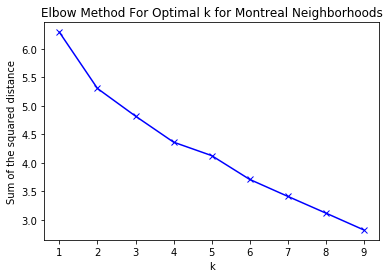

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline 

Montreal_grouped_clustering = Montreal_grouped.drop('MontrealNeighborhood', 1)
sum_of_squared_distance = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters = k,random_state=0)
    km = km.fit(Montreal_grouped_clustering)
    sum_of_squared_distance.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of the squared distance')
plt.title('Elbow Method For Optimal k for Montreal Neighborhoods')
plt.show()

In [44]:
# set number of clusters. We will use number of clusters to be 6 based on the above graph since it has the smallest slope
kclusters = 5

Montreal_grouped_clustering = Montreal_grouped.drop('MontrealNeighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Montreal_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [45]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Montreal_merged = MontrealData

# merge Montreal_grouped with MontrealData to add latitude/longitude for each neighborhood
Montreal_merged = Montreal_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# foursquare could not find any venues for 3 neighborhoods (Noveau-Bordeaux, Pointe-Saint-Charles and Jacques-Bizzard) so we need to remove these rows
Montreal_merged = Montreal_merged[np.isfinite(Montreal_merged['Cluster Labels'])]
Montreal_merged['Cluster Labels'] = Montreal_merged['Cluster Labels'].astype(int)
Montreal_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,H3L,Ahuntsic-Cartierville,Ahuntsic,45.55530,-73.67139,0,Deli / Bodega,Rental Car Location,Bus Station,Fast Food Restaurant,Metro Station,Gas Station,Park,Grocery Store,Restaurant,Coffee Shop
1,H3M,Ahuntsic-Cartierville,Nouveau-Bordeaux,45.53543,-73.68711,2,Tennis Court,Yoga Studio,English Restaurant,Football Stadium,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
2,H4J,Ahuntsic-Cartierville,Cartierville,45.52899,-73.70293,4,Construction & Landscaping,Kids Store,Yoga Studio,English Restaurant,Football Stadium,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant
3,H2Y,Ahuntsic-Cartierville,Saint-Sulpice,45.50453,-73.55515,0,Hotel,Café,French Restaurant,Italian Restaurant,Steakhouse,Plaza,Restaurant,Speakeasy,Gift Shop,Sandwich Place
4,H2B,Ahuntsic-Cartierville,Sault-au-Recollet (Ile de la Visitation),45.57523,-73.66274,0,Park,Gas Station,Café,History Museum,Yoga Studio,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant


Let's visualize the resulting clusters using folium maps

In [46]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Montreal_merged['Latitude'], Montreal_merged['Longitude'], Montreal_merged['Neighborhood'], Montreal_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now we should select each cluster and start examining what distinguishes it from the other clusters

In [47]:
Montreal_merged.loc[Montreal_merged['Cluster Labels'] == 4, Montreal_merged.columns[[2] + list(range(5, Montreal_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Cartierville,4,Construction & Landscaping,Kids Store,Yoga Studio,English Restaurant,Football Stadium,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant


In [48]:
Montreal_merged.loc[Montreal_merged['Cluster Labels'] == 3, Montreal_merged.columns[[2] + list(range(5, Montreal_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Roxboro,3,Hookah Bar,Playground,Train Station,Yoga Studio,Empanada Restaurant,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant


In [49]:
Montreal_merged.loc[Montreal_merged['Cluster Labels'] == 2, Montreal_merged.columns[[2] + list(range(5, Montreal_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Nouveau-Bordeaux,2,Tennis Court,Yoga Studio,English Restaurant,Football Stadium,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [50]:
Montreal_merged.loc[Montreal_merged['Cluster Labels'] == 1, Montreal_merged.columns[[2] + list(range(5, Montreal_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,The Plateau,1,Performing Arts Venue,Convenience Store,Fast Food Restaurant,Empanada Restaurant,Football Stadium,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Farmers Market
22,Sainte-Genevieve,1,Performing Arts Venue,Pizza Place,Convenience Store,Diner,Auto Garage,Fast Food Restaurant,Grocery Store,Empanada Restaurant,Food & Drink Shop,Food


In [51]:
Montreal_merged.loc[Montreal_merged['Cluster Labels'] == 0, Montreal_merged.columns[[2] + list(range(5, Montreal_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahuntsic,0,Deli / Bodega,Rental Car Location,Bus Station,Fast Food Restaurant,Metro Station,Gas Station,Park,Grocery Store,Restaurant,Coffee Shop
3,Saint-Sulpice,0,Hotel,Café,French Restaurant,Italian Restaurant,Steakhouse,Plaza,Restaurant,Speakeasy,Gift Shop,Sandwich Place
4,Sault-au-Recollet (Ile de la Visitation),0,Park,Gas Station,Café,History Museum,Yoga Studio,Food Court,Food & Drink Shop,Food,Fish & Chips Shop,Fast Food Restaurant
5,Anjou,0,Clothing Store,Coffee Shop,Burger Joint,Grocery Store,Pizza Place,Restaurant,Electronics Store,Fabric Shop,Fast Food Restaurant,Shop & Service
6,Cote-des-Neiges,0,Coffee Shop,Middle Eastern Restaurant,Vietnamese Restaurant,Pharmacy,Pub,Farmers Market,Thai Restaurant,Bar,Convenience Store,Burger Joint
7,Notre-Dame-de-Grace,0,Indian Restaurant,Grocery Store,Café,Pharmacy,Korean Restaurant,Bank,Persian Restaurant,Convenience Store,Pub,Diner
8,Snowdon,0,Rental Car Location,Gym,Hotel,Salon / Barbershop,Italian Restaurant,Gas Station,Park,History Museum,Pizza Place,Fast Food Restaurant
9,Ville Saint-Pierre,0,Italian Restaurant,Café,Cheese Shop,Ice Cream Shop,Pizza Place,Pub,Farmers Market,Mexican Restaurant,Bakery,Falafel Restaurant
10,LaSalle,0,Playground,Fast Food Restaurant,History Museum,Historic Site,Park,Yoga Studio,Empanada Restaurant,Food & Drink Shop,Food,Fish & Chips Shop
12,Mile End,0,Coffee Shop,Tennis Court,Art Gallery,Comfort Food Restaurant,Tea Room,Sushi Restaurant,Breakfast Spot,Café,Sandwich Place,Indian Restaurant


Observations:

Out of these 5 clusters generated, we note that clusters 1 to 4 contain few neighborhoods.\
The bulk of neighborhoods fall into cluster 0.

Cluster 4 is known for construction and landscaping.\
Cluster 3 is known for the availabilty of playgrounds and hookah bars.\   
Cluster 2 is known for its tennis courts and yoga studios.\
Cluster 1 is known for its performing arts venues and convenient stores.\
The majority of neighborhoods fall into cluster 0 which is clearly known for its abundance of coffee shops, cafes, bakeries and restaurants.


Moreover it is clear some of these cluster 0 neighborhoods are famous for their middleEastern and Meditteranian Restaurants.\
Cote-de-Neige neighborhood has MiddleEastern restaurants at number 2 and Mediterranian restaurants at number 10.\
Nun's Island Neighborhood has MiddleEastern restaurants at number 9.

So, it is pretty clear that the best option to open a new Lebanese restaurants shall be in cluster 0 neighborhoods and specifically the
four neighborhoods named above.